# **5️⃣ Generative Adversarial Networks (GANs): What They Are & How They Work 🤖🎨🔥**

## **💡 Real-Life Analogy: A High-Stakes Game of Bluffing in Texas Hold’em Poker ♠️♥️**

Imagine you’re playing **Texas Hold’em Poker** at a high-stakes table:

- One player (the **Generator** 🤹‍♂️) tries to **bluff** by creating a convincing story with their bets—even though their hand isn’t strong.  
- Another player (the **Discriminator** 👀) is a seasoned pro whose job is to **spot the bluff** and decide if the bet is genuine or fake.  
- They continuously **compete**: the bluffer improves their bluff, and the pro gets better at spotting it.  
- In the end, the bluff becomes so convincing that even the expert finds it hard to tell it apart from a real strong hand! 🎯

📌 **This dynamic rivalry is the core of a GAN:**  
- The **Generator (G)** learns to produce data that looks as real as possible,  
- While the **Discriminator (D)** learns to differentiate between real data and fake data produced by G.  
- They train **together** in an adversarial game until the Generator’s output becomes almost indistinguishable from real data. 💥

## **📌 What is a GAN?**

✅ **Generative Adversarial Networks (GANs)** are a class of deep learning models that use **two neural networks** working in opposition:

- The **Generator (G)** creates synthetic data from random noise. 🎲✨  
- The **Discriminator (D)** evaluates data to determine whether it’s **real** (from the true data distribution) or **fake** (generated by G).

### **Mathematical Formulation**

The GAN objective is expressed as a minimax game:

$$
\min_{G} \max_{D} V(D, G) = \mathbb{E}_{x \sim p_{\text{data}}(x)}\Big[\log D(x)\Big] + \mathbb{E}_{z \sim p_{z}(z)}\Big[\log\big(1-D(G(z))\big)\Big]
$$

- $ p_{\text{data}}(x) $: The distribution of real data.  
- $ p_{z}(z) $: The noise distribution (often Gaussian or Uniform).  
- $ D(x) $: Discriminator’s estimated probability that $ x $ is real.  
- $ G(z) $: Generator’s output given noise $ z $.

✅ **The goal** is for G to minimize the objective (create realistic data) while D maximizes it (detect fakes accurately). 🎯🤝

## **🔄 How Do GANs Work?**

### **Forward Propagation in GANs**

- **Generator (G)**:  
  - Takes a random noise vector $ z $ 🌀 and produces synthetic data $ G(z) $.  
  - Think of it as **creating a bluff** in poker! ♠️  
- **Discriminator (D)**:  
  - Receives either real data $ x $ or fake data $ G(z) $ and outputs a probability $ D(x) $ indicating whether the data is real.  
  - Like a **poker pro** deciding if a bet is a bluff or genuine. 👀

### **Backward Propagation in GANs**

- **Discriminator updates**:  
  - Adjust its weights to **better classify** real vs. fake data by **maximizing** the probability of correct predictions. 📈  
- **Generator updates**:  
  - Adjust its weights to **fool the discriminator** by **minimizing** the chance that D can tell the difference. 🔄

They iterate this process until the Generator produces **high-quality data** that the Discriminator can no longer easily distinguish from real data. ✨🔥

## **📊 Real-Life Sports Examples of GAN Applications**

### **⚽ Football Example: Synthetic Player Performance Data**

- **Use Case**: Generate synthetic match statistics (e.g., shots, passes, dribbles) to simulate different game scenarios for tactical analysis.  
- **How**:  
  - **G** creates synthetic player performance vectors from random noise.  
  - **D** learns to distinguish these fake performance profiles from real match data.  
- **Result**: Augmented dataset for scouting and strategy simulation. 📈🏆

### **🏀 NBA Example: Synthetic Player Stats**

- **Use Case**: Generate realistic NBA player statistics (e.g., Points Per Game, Assists+Rebounds, Efficiency) to enhance simulation models for game predictions.  
- **How**:  
  - **G** outputs synthetic stat vectors.  
  - **D** is trained to tell apart actual season stats from generated ones.  
- **Result**: Better simulation and strategic planning for teams. 🏀💡

### **♠️ Texas Hold’em Poker Example: Synthetic Hand Histories**

- **Use Case**: Generate synthetic poker hands and betting patterns to train models that analyze and optimize poker strategies.  
- **How**:  
  - **G** generates synthetic poker hand histories from noise.  
  - **D** learns to discern real hand histories from synthetic ones.  
- **Result**: Improved training data for developing advanced poker strategies. 🎰🃏

## **🛠️ Detailed Python Code Example: GAN for Synthetic NBA Player Stats**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt
from faker import Faker
import pandas as pd

In [2]:
# Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [3]:
# -------------------------------
# Data Generation for NBA Stats 🏀✨
# -------------------------------

class NBADataGenerator:
    """
    Generates synthetic NBA player statistics data.
    Each data point is a 3-dimensional vector:
    [Normalized PPG, Normalized Assists+Rebounds, Normalized Team Efficiency]
    """
    def __init__(self, n_samples=1000):
        self.n_samples = n_samples
        self.fake = Faker()
        Faker.seed(42)
    
    def generate(self):
        # Realistic ranges for NBA stats:
        # Points Per Game: 80 to 120, Assists+Rebounds: 10 to 50, Team Efficiency: 30 to 80
        ppg = np.random.randint(80, 121, self.n_samples).astype(np.float32)
        asst_reb = np.random.randint(10, 51, self.n_samples).astype(np.float32)
        eff = np.random.randint(30, 81, self.n_samples).astype(np.float32)
        
        # Normalize each feature to [0,1]
        ppg_norm = (ppg - 80) / (120 - 80)          # [0, 1]
        asst_reb_norm = (asst_reb - 10) / (50 - 10)   # [0, 1]
        eff_norm = (eff - 30) / (80 - 30)             # [0, 1]
        
        # Stack to create the dataset: shape (n_samples, 3)
        X = np.stack([ppg_norm, asst_reb_norm, eff_norm], axis=1)
        return X


In [4]:
# Instantiate the NBA data generator
nba_data_gen = NBADataGenerator(n_samples=1000)
real_nba_data = nba_data_gen.generate()

display(pd.DataFrame(real_nba_data, columns=['PPG', 'Assists+Rebounds', 'Team Efficiency']).head())


,PPG,Assists+Rebounds,Team Efficiency
0,0.950,0.625,0.18
1,0.700,0.275,0.64
2,0.350,0.625,0.98
3,0.175,0.300,0.08
4,0.500,0.975,0.92


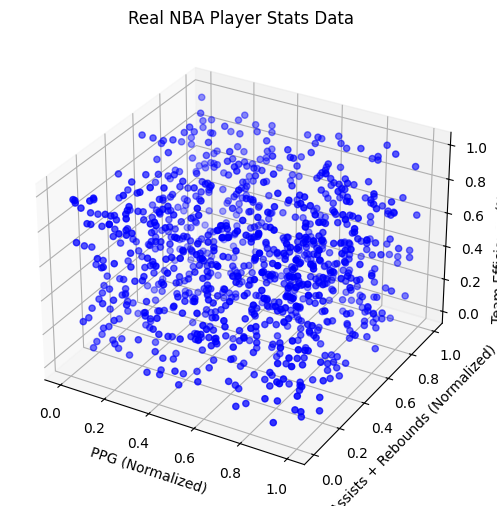

In [5]:
# Visualize the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(real_nba_data[:, 0], real_nba_data[:, 1], real_nba_data[:, 2], c='b', marker='o')
ax.set_xlabel('PPG (Normalized)')
ax.set_ylabel('Assists + Rebounds (Normalized)')
ax.set_zlabel('Team Efficiency (Normalized)')
plt.title('Real NBA Player Stats Data')
plt.show()


In [6]:
# -------------------------------
# GAN Model using TensorFlow/Keras 🏗️🔥
# -------------------------------


class GAN:
    """
    Generative Adversarial Network (GAN) class that encapsulates the generator, 
    discriminator, and the combined GAN model.
    """
    def __init__(self, noise_dim=5, data_dim=3, lr=0.0002):
        self.noise_dim = noise_dim
        self.data_dim = data_dim
        self.lr = lr
        self._build_generator()
        self._build_discriminator()
        self._build_gan()
    
    def _build_generator(self):
        """Builds the Generator model."""
        noise_input = layers.Input(shape=(self.noise_dim,))
        x = layers.Dense(16, activation='relu')(noise_input)
        x = layers.Dense(32, activation='relu')(x)
        output = layers.Dense(self.data_dim, activation='sigmoid')(x)  # Output in [0,1]
        self.generator = models.Model(noise_input, output, name="Generator")
        print("🎨 Generator Model:")
        self.generator.summary()
    
    def _build_discriminator(self):
        """Builds the Discriminator model."""
        data_input = layers.Input(shape=(self.data_dim,))
        x = layers.Dense(32, activation='relu')(data_input)
        x = layers.Dense(16, activation='relu')(x)
        output = layers.Dense(1, activation='sigmoid')(x)
        self.discriminator = models.Model(data_input, output, name="Discriminator")
        self.discriminator.compile(optimizer=optimizers.Adam(self.lr), 
                                   loss='binary_crossentropy', metrics=['accuracy'])
        print("👀 Discriminator Model:")
        self.discriminator.summary()
    
    def _build_gan(self):
        """Combines the generator and discriminator into the GAN model."""
        self.discriminator.trainable = False
        noise_input = layers.Input(shape=(self.noise_dim,))
        generated_data = self.generator(noise_input)
        validity = self.discriminator(generated_data)
        self.gan = models.Model(noise_input, validity, name="GAN")
        self.gan.compile(optimizer=optimizers.Adam(self.lr), loss='binary_crossentropy')
    
    def train(self, real_data, epochs=5000, batch_size=32, sample_interval=500):
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        
        n_batches = int(real_data.shape[0] / batch_size)
        d_losses = []
        g_losses = []
        
        for epoch in range(1, epochs+1):
            for _ in range(n_batches):
                idx = np.random.randint(0, real_data.shape[0], batch_size)
                real_samples = real_data[idx]
                noise = np.random.normal(0, 1, (batch_size, self.noise_dim))
                generated_samples = self.generator.predict(noise)
                
                d_loss_real = self.discriminator.train_on_batch(real_samples, valid)
                d_loss_fake = self.discriminator.train_on_batch(generated_samples, fake)
                d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
                
                noise = np.random.normal(0, 1, (batch_size, self.noise_dim))
                g_loss = self.gan.train_on_batch(noise, valid)
            
            d_losses.append(d_loss[0])
            g_losses.append(g_loss)
            
            if epoch % sample_interval == 0:
                print(f"Epoch {epoch}/{epochs} 🔥 [D loss: {d_loss[0]:.4f}, acc: {d_loss[1]*100:.2f}%] [G loss: {g_loss:.4f}]")
        
        return d_losses, g_losses
    
    def generate_samples(self, n_samples=10):
        noise = np.random.normal(0, 1, (n_samples, self.noise_dim))
        gen_samples = self.generator.predict(noise)
        return gen_samples

In [7]:
print("🚀 Starting GAN Training for Synthetic NBA Player Stats! 🚀")

gan = GAN(noise_dim=5, data_dim=3, lr=0.001)

🚀 Starting GAN Training for Synthetic NBA Player Stats! 🚀
🎨 Generator Model:


Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 739 (2.89 KB)

 Trainable params: 739 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

👀 Discriminator Model:


Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
real_data = nba_data_gen.generate()

d_losses, g_losses = gan.train(real_data, epochs=50, batch_size=32, sample_interval=500)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/Users/Oks_WORKSPACE/Desktop/DEV/MLX_Interview_Notes/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

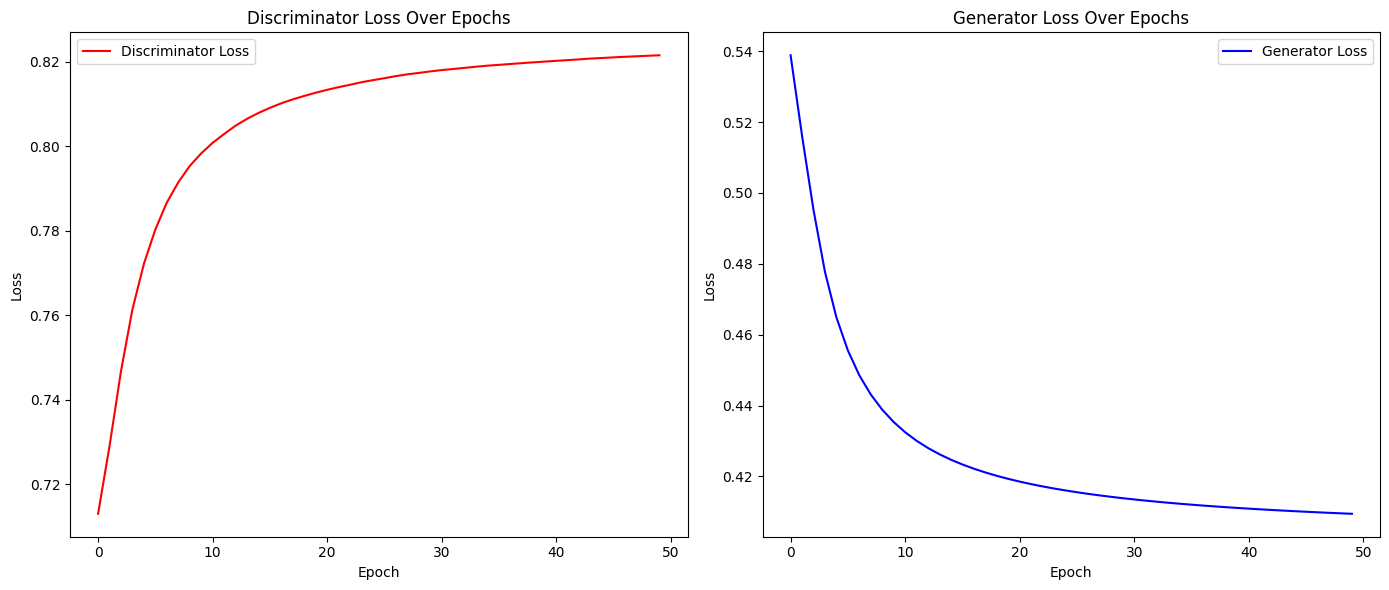

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(d_losses, color='red', label="Discriminator Loss")
plt.title("Discriminator Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(g_losses, color='blue', label="Generator Loss")
plt.title("Generator Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
gen_samples = gan.generate_samples(n_samples=100)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


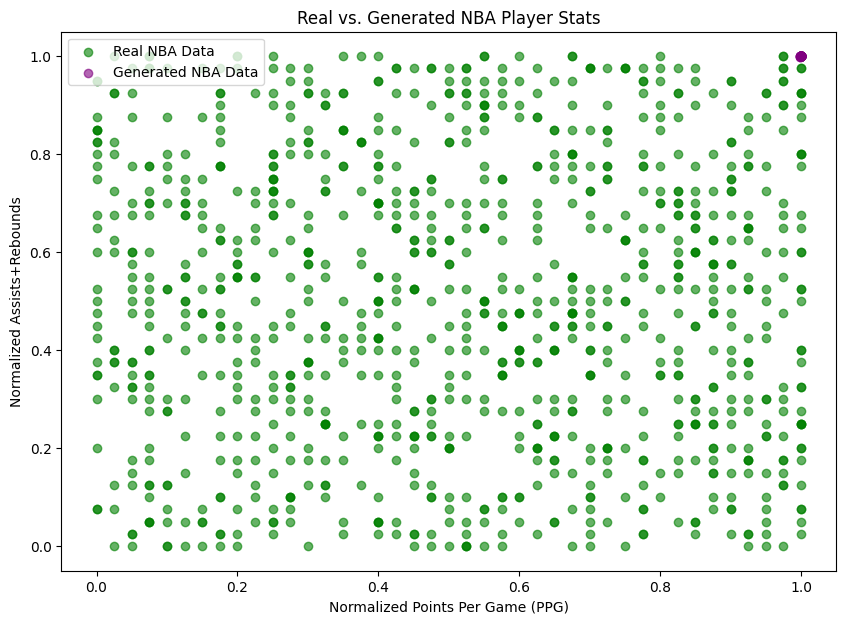

In [11]:
plt.figure(figsize=(10,7))
plt.scatter(real_data[:,0], real_data[:,1], color='green', alpha=0.6, label="Real NBA Data")
plt.scatter(gen_samples[:,0], gen_samples[:,1], color='purple', alpha=0.6, label="Generated NBA Data")
plt.title("Real vs. Generated NBA Player Stats")
plt.xlabel("Normalized Points Per Game (PPG)")
plt.ylabel("Normalized Assists+Rebounds")
plt.legend()

plt.show()


In [14]:
print("🔍 Sample Generated NBA Stats:")

for i, sample in enumerate(gen_samples[:5], start=1):
    print(f"Sample {i}: PPG: {sample[0]:.3f}, Assists+Rebounds: {sample[1]:.3f}, Efficiency: {sample[2]:.3f}")


🔍 Sample Generated NBA Stats:
Sample 1: PPG: 1.000, Assists+Rebounds: 1.000, Efficiency: 0.000
Sample 2: PPG: 1.000, Assists+Rebounds: 1.000, Efficiency: 0.000
Sample 3: PPG: 1.000, Assists+Rebounds: 1.000, Efficiency: 0.000
Sample 4: PPG: 1.000, Assists+Rebounds: 1.000, Efficiency: 0.000
Sample 5: PPG: 1.000, Assists+Rebounds: 1.000, Efficiency: 0.000


## Explanation of the Generated Output



The printed output shows that all five generated samples have identical values:
- **PPG (Points Per Game)**: 1.000 (maximum value)
- **Assists+Rebounds**: 1.000 (maximum value)
- **Efficiency**: 0.000 (minimum value)

This indicates that the GAN generator is outputting the same vector for every sample, which is a classic sign of **mode collapse**. In mode collapse, the generator converges to producing a single (or very limited) output that consistently fools the discriminator instead of generating diverse samples that capture the full distribution of real NBA player stats.


## **🔥 Detailed Explanation & Real-Life Insights**

### **Mathematical Foundations**

- **Adversarial Objective**:  
  $ \min_{G} \max_{D} \mathbb{E}_{x\sim p_{\text{data}}}\Big[\log D(x)\Big] + \mathbb{E}_{z\sim p_z}\Big[\log\big(1-D(G(z))\big)\Big] $
  - **D** is trained to **maximize** correct classifications (real vs. fake).  
  - **G** is trained to **minimize** the discriminator’s ability to distinguish its outputs from real data.  
  - This tug-of-war drives **G** to create highly realistic data.

### **Forward & Backward Propagation in GANs**

- **Forward Pass**:  
  - **G** maps noise → **Synthetic NBA stats**.  
  - **D** evaluates both real and synthetic stats.  
- **Backward Pass**:  
  - **D** is updated to better distinguish real from fake.  
  - **G** is updated based on the feedback (loss) from **D**.

### **Real-Life Sports Examples with Emojis**

- **Football ⚽**: Imagine using GANs to generate synthetic player performance metrics for simulating match scenarios—like creating realistic match stats for players even when actual data is limited.  
- **NBA 🏀**: Our example generates synthetic NBA stats that could be used to augment training data for predicting game outcomes or evaluating player performance.  
- **Texas Hold’em Poker ♠️♥️**: GANs can simulate realistic poker hand histories, helping refine strategies by training on a diverse set of scenarios—even those rarely seen in real games.

### **Visualization & Code**

- **Loss Curves**: The red and blue graphs show the adversarial training process, where both networks are in a **constant battle to outsmart each other**.  
- **Scatter Plot**: Visualizes how close the synthetic NBA data is to the real data—if the GAN is successful, the generated points will cluster similarly to the real ones.

## **🚀 Final Takeaways**

1️⃣ **GANs** use a **Generator** and a **Discriminator** in an adversarial setting to generate realistic synthetic data.  
2️⃣ They work by **competing against each other**: G tries to fool D, while D learns to distinguish fakes from real data.  
3️⃣ **Mathematically**, they optimize a **minimax objective function** using adversarial loss.  
4️⃣ **Real-life applications** span from generating synthetic sports statistics to simulating poker hands—useful for data augmentation, strategy simulation, and beyond.  
5️⃣ The provided **Python code** follows OOP principles, uses synthetic NBA data, and creates **beautiful visualizations** to help both technical and non-technical audiences understand the process. 🎉🏀🔥